In [1]:
using MAT
using LinearAlgebra
using PyPlot; plt = PyPlot

using Revise
using CMF

┌ Info: Precompiling CMF [db662885-8e4b-5931-925d-197754c06cb4]
└ @ Base loading.jl:1273


**Load data**

In [12]:
f = matread("/home/asd/data/apb/apb_1.mat");

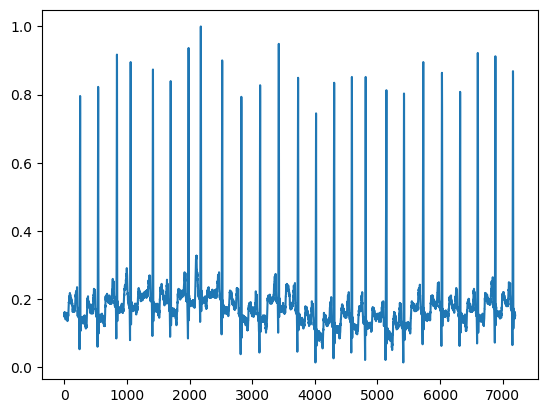

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f08e4a51d10>

In [77]:
# data = copy(f["spec_w_128"])
# data = log.(data)
# data = data[:, 1:3600]
# data = data .- sum(data) / length(data)
# data = max.(0, data)

# plt.figure()
# plt.imshow(data, aspect="auto", origin="lower")
# plt.colorbar()
# plt.show()

data = copy(f["dat"])
data = data[1:7200]
data = reshape(data, (1, length(data)))

plt.figure()
plt.plot(data[1, :])

**Fit data**

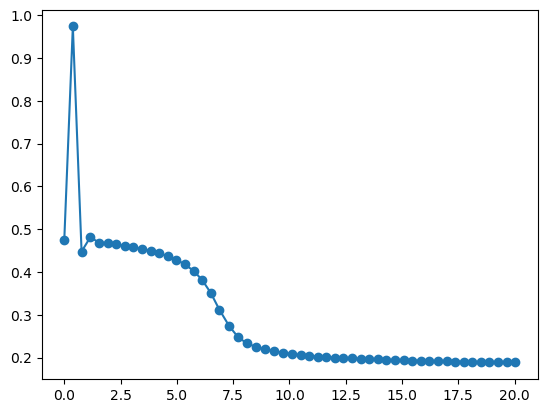

In [101]:
L = floor(Int, 0.5*360)
K = 10

res = []

plt.figure()
for lam in [1e1]  #, 10, 50, 100]
    r = fit_cnmf(data, L=L, K=K, alg=MultUpdate,
            l1_H=lam, l2_W=0.0001, max_time=20, max_itr=Inf)
    push!(res, r)
    plt.plot(r.time_hist, r.loss_hist, marker="o", 
        label=string("lam=", lam))
end
plt.show()

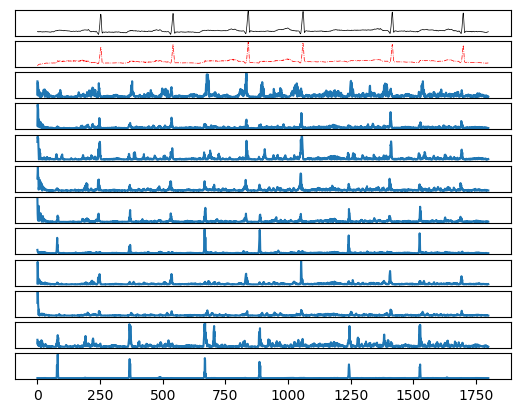

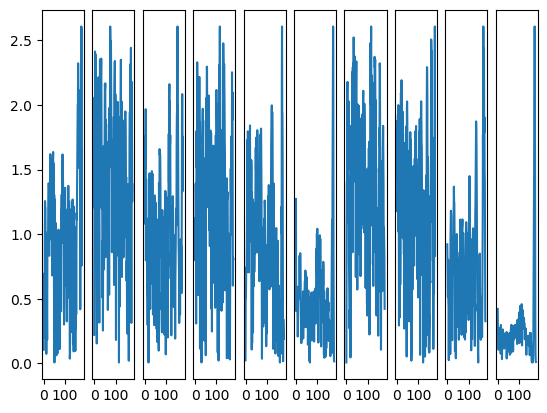

In [102]:
results = res[1]

reconstruct = CMF.tensor_conv(results.W, results.H)
tmax = 1800

# Plot truth, reconstruction, factors
plt.figure()

plt.subplot(2+K, 1, 1); 
plt.plot(data[1, 1:tmax], color="k", lw=0.5); 
plt.xticks([]); plt.yticks([])

plt.subplot(2+K, 1, 2);
plt.plot(reconstruct[1, 1:tmax], "-.", color="r", lw=0.5); 
plt.xticks([]); plt.yticks([]);
#plt.plot((data - reconstruct)[1, 1:tmax], color="b")
for k = 1:K
    plt.subplot(2+K, 1, 2+k); plt.plot(results.H[k, 1:tmax])
    (k != K) && plt.xticks([])
    plt.yticks([])
end
plt.show()

# Plot motifs
plt.figure()
for k = 1:K
    plt.subplot(1, K, k); plt.plot(results.W[:, 1, k])
    (k != 1) && plt.yticks([])
end
plt.show()

In [95]:
# Problem: DC component is too strong
# Solution: drop anything with negligible power in log domain
# DONE
# Problem: to handle l1 regularizer, we can just make H 
# arbitrarily small
# Solution: Renormalize W to sum to 1 after each step
# DONE

# Problem: getting DC factors W
# Solution: More sparsity regularization? <--- not working
# Maybe shuffle HALS? (going in order probably messes things up)
# TODO

# TODO read gordons paper and the other dictionary paper

In [ ]:
# plt.figure()
# plt.imshow(reconstruct, aspect="auto", origin="lower")
# plt.colorbar()
# plt.show()

# plt.figure(figsize=(1.5, 4))
# plt.subplot(1, 2, 1)
# plt.imshow(results.W[:, :, 1]', 
#     aspect="auto", origin="lower", clim=(0, 10))
# plt.subplot(1, 2, 2)
# plt.imshow(results.W[:, :, 2]', 
#     aspect="auto", origin="lower", clim=(0, 10))
# plt.show()

# plt.figure()
# plt.subplot(2, 1, 1)
# plt.plot(results.H[1, :])
# plt.subplot(2, 1, 2)
# plt.plot(results.H[2, :], color="r")
# plt.show()